<a href="https://colab.research.google.com/github/freejae98/freejae98.github.io/blob/master/2022_07_12_Finance_data_crawling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install finance-datareader
!pip install -U finance-datareader # 업데이트

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr

In [ ]:
plt.rcParams["figure.figsize"] = (20, 6)
plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams["axes.unicode_minus"] = False

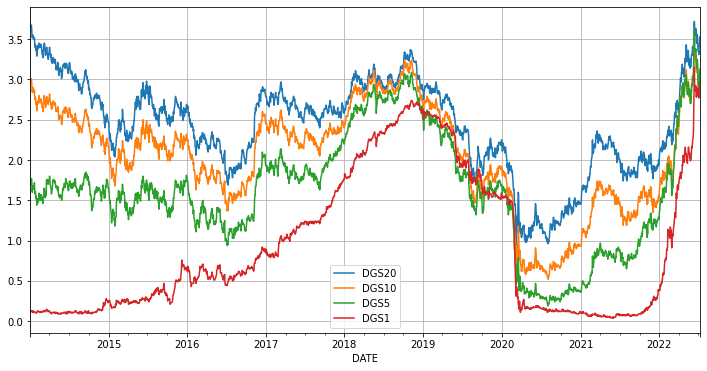

In [ ]:
# 1) 미국 국채 금리 (20년, 10, 5, 1)
DGS = fdr.DataReader(['DGS20', 'DGS10', 'DGS5', 'DGS1'], start="2014-1-1", data_source = 'fred')
graph = DGS.plot()
# graph.axhline

In [ ]:
DGS.head()

,DGS20,DGS10,DGS5,DGS1
DATE,,,,
2014-01-02,3.68,3.00,1.72,0.13
2014-01-03,3.69,3.01,1.73,0.13
2014-01-06,3.66,2.98,1.70,0.12
2014-01-07,3.64,2.96,1.69,0.13
2014-01-08,3.67,3.01,1.77,0.13


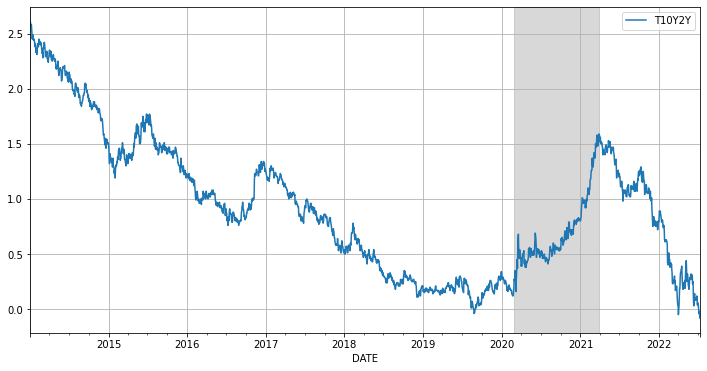

In [ ]:
# 2) 미국 장단기 금리차 - 금리차가 커질수록 경제위기 발생
T10Y2Y = fdr.DataReader('T10Y2Y', start = "2014-1-1", data_source = 'fred')
graph = T10Y2Y.plot()
graph.axvspan('2020-3-1', '2021-3-30', color='gray', alpha=0.3)

In [ ]:
T10Y2Y

,T10Y2Y
DATE,
2014-01-02,2.61
2014-01-03,2.60
2014-01-06,2.58
2014-01-07,2.56
2014-01-08,2.58
...,...
2022-07-05,0.00
2022-07-06,-0.04
2022-07-07,-0.02


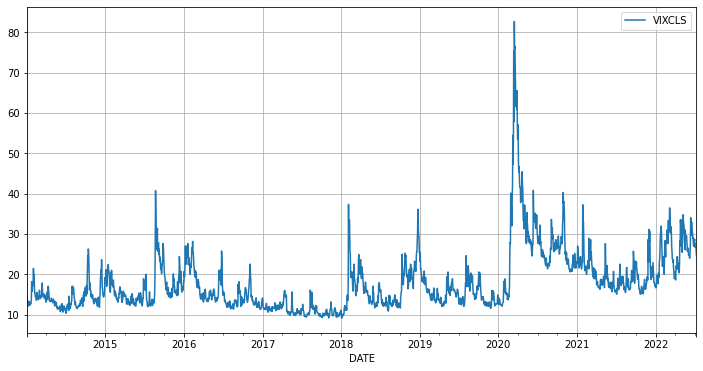

In [ ]:
# 3) VIX - 변동성 지수 (공포지수)
VIX = fdr.DataReader('VIXCLS', start='2014-1-1', data_source='fred')
graph = VIX.plot()

In [ ]:
VIX

,VIXCLS
DATE,
2014-01-02,14.23
2014-01-03,13.76
2014-01-06,13.55
2014-01-07,12.92
2014-01-08,12.87
...,...
2022-07-04,27.53
2022-07-05,27.54
2022-07-06,26.73


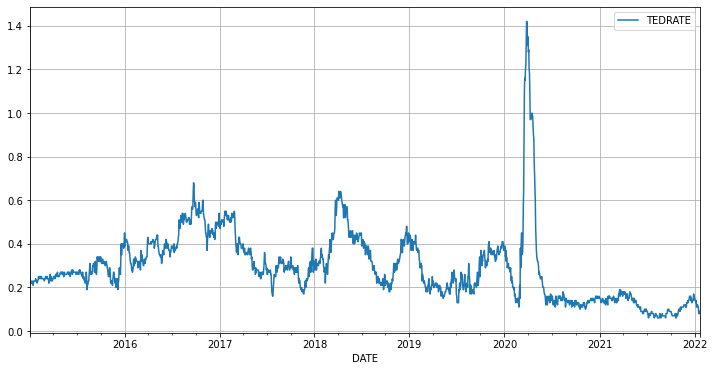

In [ ]:
# 4) 금융 신용경색 지표 - TED Spread
TEDRATE = fdr.DataReader('TEDRATE', start='2015-1-1', data_source='fred')
graph = TEDRATE.plot()

In [ ]:
TEDRATE

,TEDRATE
DATE,
2015-01-02,0.24
2015-01-05,0.22
2015-01-06,0.22
2015-01-07,0.22
2015-01-08,0.22
...,...
2022-01-17,0.11
2022-01-18,0.08
2022-01-19,0.09


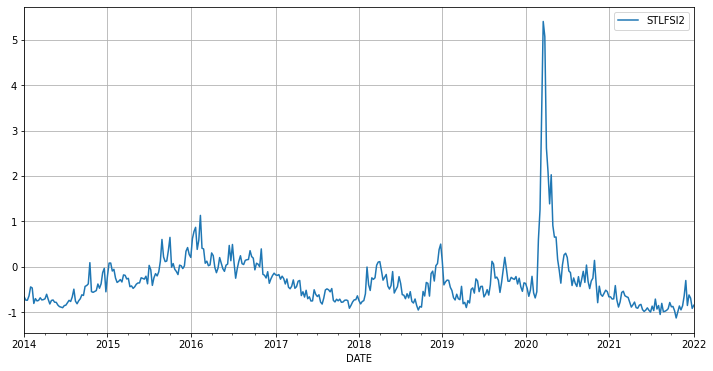

In [ ]:
# 5) 금융 스트레스 지수
STLFSI2 = fdr.DataReader('STLFSI2', start='2014-1-1', data_source='fred')
graph = STLFSI2.plot()

In [ ]:
STLFSI2

,STLFSI2
DATE,
2014-01-03,-0.6673
2014-01-10,-0.7387
2014-01-17,-0.7403
2014-01-24,-0.6439
2014-01-31,-0.4471
...,...
2021-12-10,-0.8560
2021-12-17,-0.6238
2021-12-24,-0.6939


In [ ]:
# 6) 상품 선물 가격 데이터
df_gas = fdr.DataReader('NG') # NG 천연가스 선물 (NYMEX)
df_gold = fdr.DataReader('GC') # 금 선물 (ICE)
df_AG = fdr.DataReader('SI') # 은 선물 (ICE)
df_CU = fdr.DataReader('HG') # 구리 선물 (COMEX)
df_WTI = fdr.DataReader('CL') # WTI 선물 (NYMEX)

In [ ]:
df_gas

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1990-04-04,1.620,1.600,1.650,1.599,80.0,-0.0092
1990-04-05,1.615,1.615,1.635,1.610,60.0,-0.0031
1990-04-06,1.625,1.615,1.635,1.610,60.0,0.0062
1990-04-09,1.637,1.612,1.640,1.612,40.0,0.0074
1990-04-10,1.620,1.627,1.630,1.613,30.0,-0.0104
...,...,...,...,...,...,...
2022-06-30,5.424,6.428,6.602,5.357,182580.0,-0.1653
2022-07-01,5.730,5.701,5.950,5.590,106970.0,0.0564
2022-07-05,5.523,5.712,5.907,5.325,110170.0,-0.0564


In [ ]:
# 7) 국가별 대표 지수
df_SSEC = fdr.DataReader('SSEC', '2014-01-01') # 상해 종합
df_CSI300 = fdr.DataReader('CSI300', '2014-01-01') # CSI 300 (중국)

df_DJI = fdr.DataReader('DJI', '2014-01-01') # 다우존스 지수
df_IXIC = fdr.DataReader('IXIC', '2014-01-01') # 나스닥 종합 지수
df_US500 = fdr.DataReader('US500', '2014-01-01') # S&P 500 종목

df_KS11 = fdr.DataReader('KS11', '2014-01-01') # 코스피 종합 지수

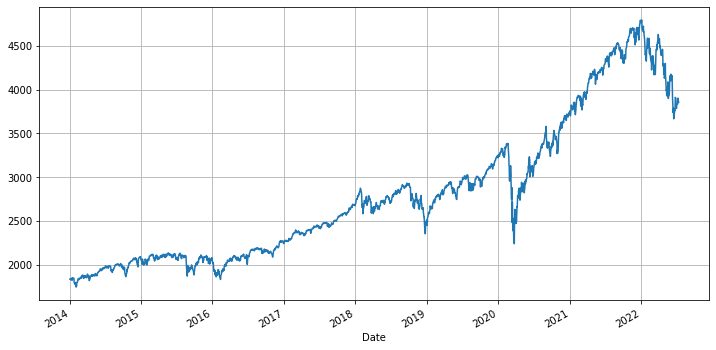

In [ ]:
graph = df_US500['Close'].plot()

In [ ]:
df_SSEC

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2014-01-02,2109.39,2112.13,2113.11,2101.02,6.850000e+09,-0.0031
2014-01-03,2083.14,2101.54,2102.17,2075.90,8.450000e+09,-0.0124
2014-01-06,2045.71,2078.68,2078.68,2034.01,8.960000e+09,-0.0180
2014-01-07,2047.32,2034.22,2052.28,2029.25,6.340000e+09,0.0008
2014-01-08,2044.34,2047.26,2062.95,2037.11,7.160000e+09,-0.0015
...,...,...,...,...,...,...
2022-07-06,3355.35,3391.03,3391.03,3333.10,3.846000e+10,-0.0143
2022-07-07,3364.40,3353.13,3375.86,3332.31,3.344000e+10,0.0027
2022-07-08,3356.08,3380.37,3386.31,3354.12,3.229000e+10,-0.0025


In [ ]:
# # S&P 500 symbol list
# sp500 = fdr.StockListing('S&P500')
# sp500

In [ ]:
# stocks = fdr.StockListing('SSE') # 상해 거래소
# stocks

In [ ]:
# fdr.DataReader('CBOE', '2020-01-01', exchange='AMEX') # Cboe Global Markets (CBOE)


In [ ]:
from datetime import date, timedelta

# 데이터 조합하기 - dataframe 형태로 합치기
start_date = pd.to_datetime('2014-01-02') ## 시작 날짜
end_date = pd.to_datetime(date.today()) ## 마지막 날짜
 
## 시작 날짜와 마지막 날짜 사이에 날짜를 생성하고 이를 인덱스로 설정
t_date = pd.date_range(start_date,end_date,freq='d')

t_date = pd.DataFrame(t_date, columns=['N_Date'])
t_date.rename(columns = {'N_Date':'Date'},inplace=True)
t_date

,Date
0,2014-01-02
1,2014-01-03
2,2014-01-04
3,2014-01-05
4,2014-01-06
...,...
3109,2022-07-08
3110,2022-07-09
3111,2022-07-10
3112,2022-07-11


In [ ]:
T10Y2Y

,T10Y2Y
DATE,
2014-01-02,2.61
2014-01-03,2.60
2014-01-06,2.58
2014-01-07,2.56
2014-01-08,2.58
...,...
2022-07-05,0.00
2022-07-06,-0.04
2022-07-07,-0.02


In [ ]:
# 데이터 하나의 툴로 조합하기

# 1) T10Y2Y - 미국 장단기 금리차
df1 = T10Y2Y.rename(columns = {'T10Y2Y':'8)T10Y2Y'})
df1.index.names = ["Date"]
df1


data_set1 = pd.merge(t_date, df1, how='left', on='Date') # , left_index=True, right_index=True)
data_set1

,Date,8)T10Y2Y
0,2014-01-02,2.61
1,2014-01-03,2.60
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,2.58
...,...,...
3109,2022-07-08,-0.03
3110,2022-07-09,NaN
3111,2022-07-10,NaN
3112,2022-07-11,-0.08


In [ ]:
# 2) VIX - 변동성 지수 (공포지수)
df2 = VIX.rename(columns = {'VIXCLS':'8)VIXCLS'})
df2.index.names = ["Date"]
df2


data_set2 = pd.merge(data_set1, df2, how='left', on='Date') # , left_index=True, right_index=True)
data_set2

,Date,8)T10Y2Y,8)VIXCLS
0,2014-01-02,2.61,14.23
1,2014-01-03,2.60,13.76
2,2014-01-04,NaN,NaN
3,2014-01-05,NaN,NaN
4,2014-01-06,2.58,13.55
...,...,...,...
3109,2022-07-08,-0.03,24.64
3110,2022-07-09,NaN,NaN
3111,2022-07-10,NaN,NaN
3112,2022-07-11,-0.08,NaN


In [ ]:
# 3) TEDRATE - 금융 신용경색 지표 - TED Spread
df3 = TEDRATE.rename(columns = {'TEDRATE':'8)TEDRATE'})
df3.index.names = ["Date"]
df3


data_set3 = pd.merge(data_set2, df3, how='left', on='Date') # , left_index=True, right_index=True)
data_set3

,Date,8)T10Y2Y,8)VIXCLS,8)TEDRATE
0,2014-01-02,2.61,14.23,NaN
1,2014-01-03,2.60,13.76,NaN
2,2014-01-04,NaN,NaN,NaN
3,2014-01-05,NaN,NaN,NaN
4,2014-01-06,2.58,13.55,NaN
...,...,...,...,...
3109,2022-07-08,-0.03,24.64,NaN
3110,2022-07-09,NaN,NaN,NaN
3111,2022-07-10,NaN,NaN,NaN
3112,2022-07-11,-0.08,NaN,NaN


In [ ]:
# 4) STLFSI2 - 금융 스트레스 지수
df4 = STLFSI2.rename(columns = {'STLFSI2':'8)STLFSI2'})
df4.index.names = ["Date"]
df4


data_set4 = pd.merge(data_set3, df4, how='left', on='Date') # , left_index=True, right_index=True)
data_set4

,Date,8)T10Y2Y,8)VIXCLS,8)TEDRATE,8)STLFSI2
0,2014-01-02,2.61,14.23,NaN,NaN
1,2014-01-03,2.60,13.76,NaN,-0.6673
2,2014-01-04,NaN,NaN,NaN,NaN
3,2014-01-05,NaN,NaN,NaN,NaN
4,2014-01-06,2.58,13.55,NaN,NaN
...,...,...,...,...,...
3109,2022-07-08,-0.03,24.64,NaN,NaN
3110,2022-07-09,NaN,NaN,NaN,NaN
3111,2022-07-10,NaN,NaN,NaN,NaN
3112,2022-07-11,-0.08,NaN,NaN,NaN


In [ ]:
# 5) 상품 선물 가격 데이터 - df_gas / df_gold / df_AG / df_CU / df_WTI
df5_1 = df_gas.rename(columns = {'Close':'8)df_gas'})
df5_2 = df_gold.rename(columns = {'Close':'8)df_gold'})
df5_3 = df_AG.rename(columns = {'Close':'8)df_AG'})
df5_4 = df_CU.rename(columns = {'Close':'8)df_CU'})
df5_5 = df_WTI.rename(columns = {'Close':'8)df_WTI'})

# df5.index.names = ["Date"]
# df5


data_set5_1 = pd.merge(data_set4, df5_1['8)df_gas'], how='left', on='Date') 
data_set5_2 = pd.merge(data_set5_1, df5_2['8)df_gold'], how='left', on='Date') 
data_set5_3 = pd.merge(data_set5_2, df5_3['8)df_AG'], how='left', on='Date') 
data_set5_4 = pd.merge(data_set5_3, df5_4['8)df_CU'], how='left', on='Date') 
data_set5_5 = pd.merge(data_set5_4, df5_5['8)df_WTI'], how='left', on='Date') 



data_set5_5

,Date,8)T10Y2Y,8)VIXCLS,8)TEDRATE,8)STLFSI2,8)df_gas,8)df_gold,8)df_AG,8)df_CU,8)df_WTI
0,2014-01-02,2.61,14.23,NaN,NaN,4.321,4.50,NaN,3.432,64.30
1,2014-01-03,2.60,13.76,NaN,-0.6673,4.304,4.48,NaN,3.406,64.18
2,2014-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-06,2.58,13.55,NaN,NaN,4.306,4.42,NaN,3.412,64.14
...,...,...,...,...,...,...,...,...,...,...
3109,2022-07-08,-0.03,24.64,NaN,NaN,NaN,5.65,63.27,NaN,78.35
3110,2022-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3111,2022-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3112,2022-07-11,-0.08,NaN,NaN,NaN,NaN,5.65,59.30,NaN,78.70


In [ ]:
# 6) 국가별 대표 지수 - df_SSEC  / df_CSI300  / df_DJI  / df_IXIC  / df_US500 / df_KS11 
df6_1 = df_SSEC.rename(columns = {'Close':'8)df_SSEC'})
df6_2 = df_CSI300.rename(columns = {'Close':'8)df_CSI300'})
df6_3 = df_DJI.rename(columns = {'Close':'8)df_DJI'})
df6_4 = df_IXIC.rename(columns = {'Close':'8)df_IXIC'})
df6_5 = df_US500.rename(columns = {'Close':'8)df_US500'})
df6_6 = df_KS11.rename(columns = {'Close':'8)df_KS11'})

# df5.index.names = ["Date"]
# df5


data_set6_1 = pd.merge(data_set5_5, df6_1['8)df_SSEC'], how='left', on='Date') 
data_set6_2 = pd.merge(data_set6_1, df6_2['8)df_CSI300'], how='left', on='Date') 
data_set6_3 = pd.merge(data_set6_2, df6_3['8)df_DJI'], how='left', on='Date') 
data_set6_4 = pd.merge(data_set6_3, df6_4['8)df_IXIC'], how='left', on='Date') 
data_set6_5 = pd.merge(data_set6_4, df6_5['8)df_US500'], how='left', on='Date') 
data_set6_6 = pd.merge(data_set6_5, df6_6['8)df_KS11'], how='left', on='Date') 



data_set6_6

,Date,8)T10Y2Y,8)VIXCLS,8)TEDRATE,8)STLFSI2,8)df_gas,8)df_gold,8)df_AG,8)df_CU,8)df_WTI,8)df_SSEC,8)df_CSI300,8)df_DJI,8)df_IXIC,8)df_US500,8)df_KS11
0,2014-01-02,2.61,14.23,NaN,NaN,4.321,4.50,NaN,3.432,64.30,2109.39,2321.98,16441.35,4143.07,1831.98,1967.19
1,2014-01-03,2.60,13.76,NaN,-0.6673,4.304,4.48,NaN,3.406,64.18,2083.14,2290.78,16469.99,4131.91,1831.37,1946.14
2,2014-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-06,2.58,13.55,NaN,NaN,4.306,4.42,NaN,3.412,64.14,2045.71,2238.64,16425.10,4113.68,1826.77,1953.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,2022-07-08,-0.03,24.64,NaN,NaN,NaN,5.65,63.27,NaN,78.35,3356.08,4428.78,31339.20,11635.31,3899.38,2350.61
3110,2022-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3111,2022-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3112,2022-07-11,-0.08,NaN,NaN,NaN,NaN,5.65,59.30,NaN,78.70,3313.58,4354.62,31175.52,11372.60,3854.43,2340.27


In [ ]:
print(data_set6_6.isnull().sum())     # 각 열의 Null 개수 확인


# 빈데이터 채우기 - 1) 앞 값으로 채우기
data_set_FF = data_set6_6.fillna(method='ffill')
print(data_set_FF.isnull().sum())

# 빈데이터 채우기 - 2) 뒷 값으로 채우기
data_set_BF = data_set_FF.fillna(method='bfill')
print(data_set_BF.isnull().sum())

Date              0
8)T10Y2Y        891
8)VIXCLS        892
8)TEDRATE      1273
8)STLFSI2      2695
8)df_gas        976
8)df_gold      1039
8)df_AG        2443
8)df_CU        1097
8)df_WTI        969
8)df_SSEC      1039
8)df_CSI300    1039
8)df_DJI        969
8)df_IXIC       969
8)df_US500      969
8)df_KS11      1017
dtype: int64
Date              0
8)T10Y2Y          0
8)VIXCLS          0
8)TEDRATE       365
8)STLFSI2         1
8)df_gas          0
8)df_gold         0
8)df_AG        2136
8)df_CU           0
8)df_WTI          0
8)df_SSEC         0
8)df_CSI300       0
8)df_DJI          0
8)df_IXIC         0
8)df_US500        0
8)df_KS11         0
dtype: int64
Date           0
8)T10Y2Y       0
8)VIXCLS       0
8)TEDRATE      0
8)STLFSI2      0
8)df_gas       0
8)df_gold      0
8)df_AG        0
8)df_CU        0
8)df_WTI       0
8)df_SSEC      0
8)df_CSI300    0
8)df_DJI       0
8)df_IXIC      0
8)df_US500     0
8)df_KS11      0
dtype: int64


In [ ]:
# 완료된 것을 파일에 쓰기 - data_set_FN
data_set_FN = data_set_BF.set_index('Date', inplace=False)

data_set_FN.to_excel('/content/finance_data.xlsx', index=True)

In [ ]:
data_set_FN

,8)T10Y2Y,8)VIXCLS,8)TEDRATE,8)STLFSI2,8)df_gas,8)df_gold,8)df_AG,8)df_CU,8)df_WTI,8)df_SSEC,8)df_CSI300,8)df_DJI,8)df_IXIC,8)df_US500,8)df_KS11
Date,,,,,,,,,,,,,,,
2014-01-02,2.61,14.23,0.24,-0.6673,4.321,4.50,13.02,3.432,64.30,2109.39,2321.98,16441.35,4143.07,1831.98,1967.19
2014-01-03,2.60,13.76,0.24,-0.6673,4.304,4.48,13.02,3.406,64.18,2083.14,2290.78,16469.99,4131.91,1831.37,1946.14
2014-01-04,2.60,13.76,0.24,-0.6673,4.304,4.48,13.02,3.406,64.18,2083.14,2290.78,16469.99,4131.91,1831.37,1946.14
2014-01-05,2.60,13.76,0.24,-0.6673,4.304,4.48,13.02,3.406,64.18,2083.14,2290.78,16469.99,4131.91,1831.37,1946.14
2014-01-06,2.58,13.55,0.24,-0.6673,4.306,4.42,13.02,3.412,64.14,2045.71,2238.64,16425.10,4113.68,1826.77,1953.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-08,-0.03,24.64,0.09,-0.8509,6.297,5.65,63.27,3.582,78.35,3356.08,4428.78,31339.20,11635.31,3899.38,2350.61
2022-07-09,-0.03,24.64,0.09,-0.8509,6.297,5.65,63.27,3.582,78.35,3356.08,4428.78,31339.20,11635.31,3899.38,2350.61
2022-07-10,-0.03,24.64,0.09,-0.8509,6.297,5.65,63.27,3.582,78.35,3356.08,4428.78,31339.20,11635.31,3899.38,2350.61
